
<center>
  <h1 style="background: linear-gradient(135deg, #1E90FF, #00FF7F); color: #FFFFFF; font-size: 48px; font-weight: bold; font-family: 'Georgia', serif; border: 3px solid #00FF7F; padding: 15px; border-radius: 10px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">Lego Analysis</h1>
</center>


# Introduction


<img src="https://miro.medium.com/v2/resize:fit:1000/0*13pOHMokpp8HaMsj.jpeg">





Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>


# Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from ydata_profiling import ProfileReport

# Reading Dataset

In [2]:
color_df = pd.read_csv("/kaggle/input/lego-database/colors.csv")
set_df = pd.read_csv("/kaggle/input/lego-database/sets.csv")
theme_df = pd.read_csv("/kaggle/input/lego-database/themes.csv")

# Data Exploration

In [3]:
profile = ProfileReport(set_df,title='Set report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
profile = ProfileReport(theme_df,title='themes report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [5]:
color_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [6]:
color_df['name'].nunique()

135

### Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [7]:
color_df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [8]:
color_df['is_trans'].value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets
Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.
<img src="https://imgur.com/aKcwkSx.png" >


A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.
<img src="https://imgur.com/whB1olq.png">

In [9]:
set_df.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [10]:
set_df.tail()

,set_num,name,year,theme_id,num_parts
11668,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,408,15
11669,WHITEHOUSE-1,Micro White House,2015,598,59
11670,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146
11671,WishingWell-1,Wishing Well [Toys R Us Promo],2013,494,28
11672,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,3


### In which year were the first LEGO sets released and what were these sets called?

In [11]:
set_df['year'].sort_values().head()

6935    1950
6938    1950
6956    1950
6957    1950
6959    1950
Name: year, dtype: int64

### How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [12]:
set_df[set_df['year']==1950]

,set_num,name,year,theme_id,num_parts
6935,700.1.1-1,Individual 2 x 4 Bricks,1950,371,10
6938,700.1.2-1,Individual 2 x 2 Bricks,1950,371,9
6954,700.A-1,Automatic Binding Bricks Small Brick Set (Lego...,1950,366,24
6956,700.B.1-1,Individual 1 x 4 x 2 Window (without glass),1950,371,7
6957,700.B.2-1,Individual 1 x 2 x 3 Window (without glass),1950,371,7
6958,700.B.3-1,Individual 1 x 2 x 2 Window (without glass),1950,371,7
6959,700.B.4-1,Individual 1 x 2 x 4 Door (without glass),1950,371,7


#### Find the top 5 LEGO sets with the most number of parts. 

In [13]:
set_df.sort_values('num_parts',ascending=False).head()

,set_num,name,year,theme_id,num_parts
170,10189-1,Taj Mahal,2008,276,5922
11614,SWMP-1,Star Wars / M&M Mosaic - Promo Set,2005,169,5461
1337,2000409-1,Window Exploration Bag,2010,507,5200
161,10179-1,Millennium Falcon - UCS,2007,174,5195
8322,75827-1,Firehouse Headquarters,2016,301,4640


### Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [14]:
set_df.groupby(set_df['year']==1955)['num_parts'].count()

year
False    11645
True        28
Name: num_parts, dtype: int64

In [15]:
set_df.groupby(set_df['year']==2019)['num_parts'].count()

year
False    11673
Name: num_parts, dtype: int64

### Show the number of LEGO releases on a line chart using Matplotlib. <br>
 

In [16]:
sets_by_year = set_df.groupby('year').count()
sets_by_year.head()

,set_num,name,theme_id,num_parts
year,,,,
1950,7,7,7,7
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
1956,12,12,12,12


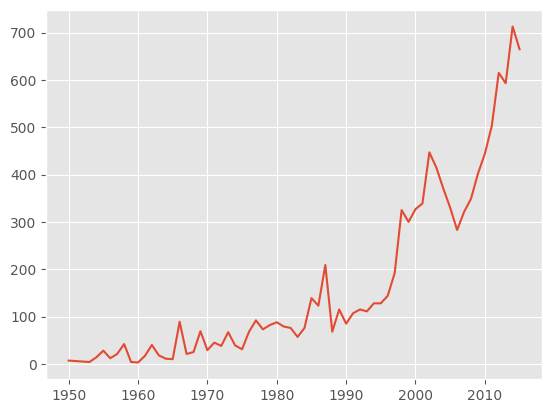

In [17]:
plt.plot(sets_by_year.index[:-2],sets_by_year['set_num'][:-2])
plt.show()

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [18]:
themes_by_year = set_df.groupby('year').agg({'theme_id' : pd.Series.nunique })

In [19]:
themes_by_year.rename(columns={'theme_id':'nr_themes'},inplace=True)
themes_by_year.head()

,nr_themes
year,
1950,2
1953,1
1954,2
1955,4
1956,3


In [20]:
themes_by_year.tail() #Here we can see that LEGO only had 2 themes during the first few years, but just like the number of sets the number of themes expanded manifold over the years.

,nr_themes
year,
2013,93
2014,92
2015,98
2016,86
2017,57


### Plot the number of themes released by year on a line chart. Only include the full calendar years. 

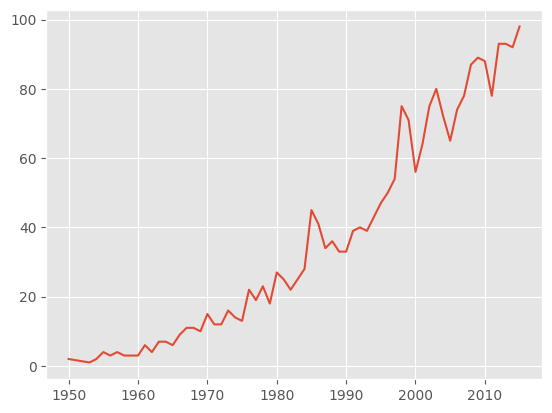

In [21]:
plt.plot(themes_by_year.index[:-2],themes_by_year['nr_themes'][:-2])
plt.show()

### Line Charts with Two Seperate Axes

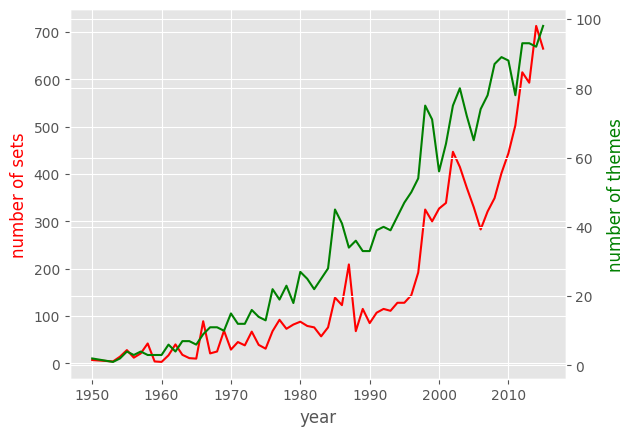

In [22]:
ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.plot(sets_by_year.index[:-2],sets_by_year.set_num[:-2],color='r')
ax2.plot(themes_by_year.index[:-2],themes_by_year.nr_themes[:-2],color='g')


ax1.set_xlabel('year')
ax1.set_ylabel('number of sets',color='r')
ax2.set_ylabel('number of themes',color='g')

plt.show()


### Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [23]:
parts_per_set = set_df.groupby('year').agg({'num_parts':pd.Series.mean})

In [24]:
parts_per_set.head()

,num_parts
year,
1950,10.142857
1953,16.500000
1954,12.357143
1955,36.857143
1956,18.500000


### Scatter Plots in Matplotlib

### Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

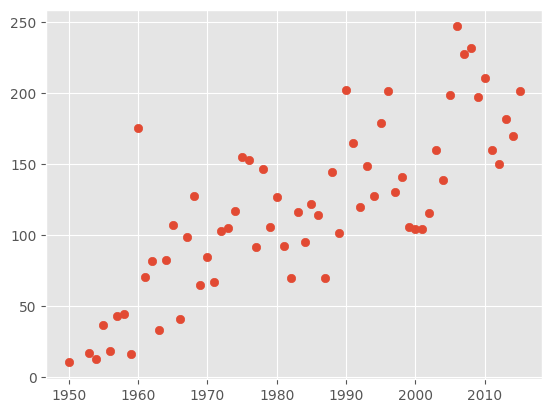

In [25]:
plt.scatter(parts_per_set.index[:-2],parts_per_set.num_parts[:-2])
plt.show()

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [26]:
set_df['theme_id'].value_counts()

theme_id
501    246
371    240
504    219
220    216
494    192
      ... 
599      1
176      1
46       1
45       1
109      1
Name: count, Length: 575, dtype: int64

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

### Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [27]:
theme_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [28]:
theme_df[theme_df.name=='Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
157,158,Star Wars,NaN
208,209,Star Wars,207.0
224,225,Star Wars,217.0
260,261,Star Wars,258.0
430,431,Star Wars,425.0


In [29]:
set_df[set_df.theme_id==18]

,set_num,name,year,theme_id,num_parts
6283,65081-1,R2-D2 8009 / C-3PO 8007 Droid Collectors Set,2002,18,3
11301,K8008-1,Darth Vader / Stormtrooper Kit,2002,18,2


In [30]:
set_df[set_df.theme_id==209]

,set_num,name,year,theme_id,num_parts
7990,75023-1,"Advent Calendar 2013, Star Wars",2013,209,24
8046,75056-1,Advent Calendar 2014 Star Wars,2014,209,24
8154,75146-1,Advent Calendar 2016 Star Wars,2016,209,282
8946,7958-1,Advent Calendar 2011 Star Wars,2011,209,25
10624,9509-1,"Advent Calendar 2012, Star Wars",2012,209,25


### Merging (i.e., Combining) DataFrames based on a Key


In [31]:
set_theme_count = set_df['theme_id'].value_counts()
set_theme_count.head()

theme_id
501    246
371    240
504    219
220    216
494    192
Name: count, dtype: int64

In [32]:
set_theme_count = pd.DataFrame({'id':set_theme_count.index,'set_count':set_theme_count.values})
set_theme_count

,id,set_count
0,501,246
1,371,240
2,504,219
3,220,216
4,494,192
...,...,...
570,599,1
571,176,1
572,46,1
573,45,1


In [33]:
merged_df = pd.merge(set_theme_count,theme_df,on='id')
merged_df

,id,set_count,name,parent_id
0,501,246,Gear,NaN
1,371,240,Supplemental,365.0
2,504,219,Duplo,NaN
3,220,216,City,217.0
4,494,192,Friends,NaN
...,...,...,...,...
570,599,1,LEGO Exclusive,NaN
571,176,1,Planet Series 1,158.0
572,46,1,Harbor,38.0
573,45,1,Cargo,38.0


<BarContainer object of 10 artists>

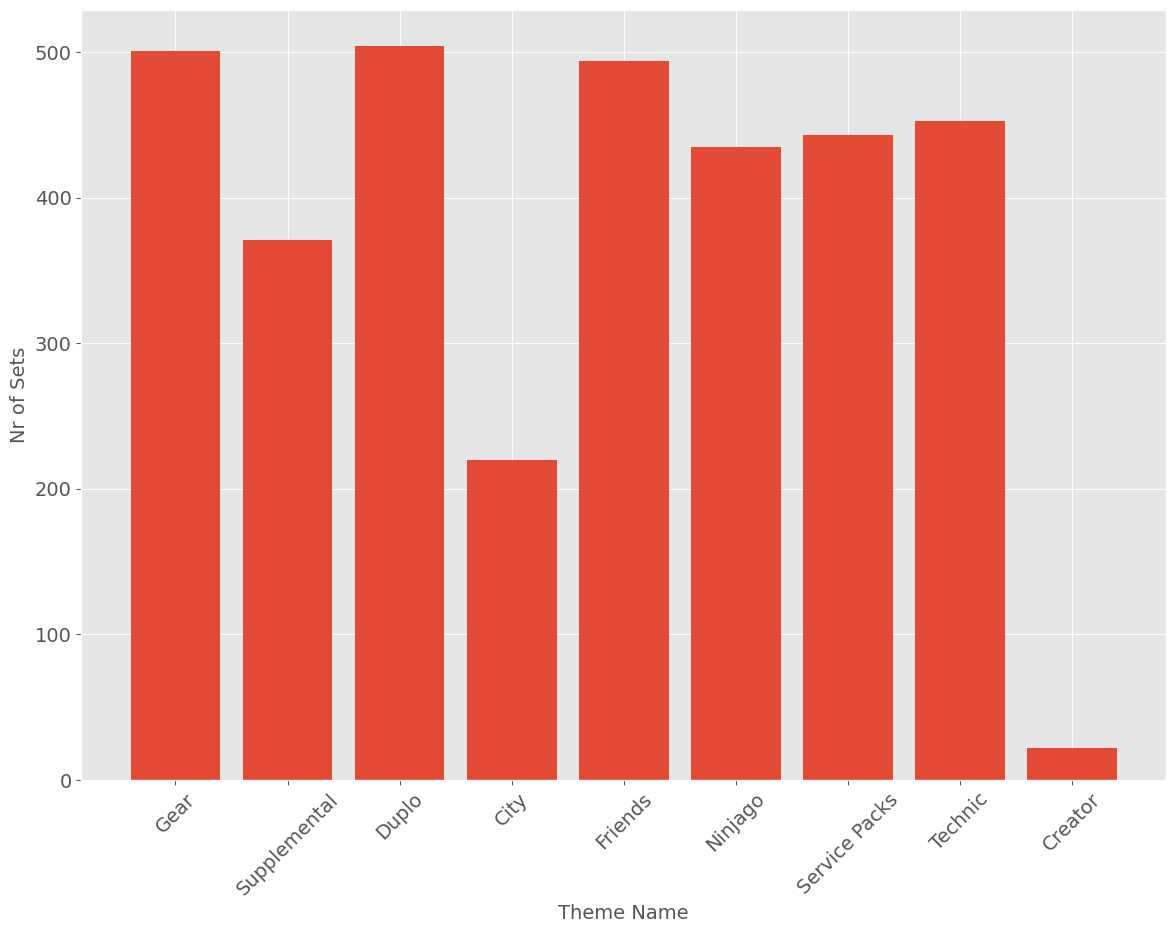

In [34]:
plt.figure(figsize=(14,10))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)


plt.bar(merged_df.name[:10],merged_df.id[:10])